In [227]:
import pandas as pd

df = pd.read_csv("troop_movements.csv")

counts = df['empire_or_resistance'].value_counts()

# Print the counts
counts_df = counts.reset_index()
counts_df.columns = ['empire_or_resistance', 'count']

# Print the DataFrame
print(counts_df)


  empire_or_resistance  count
0               empire    518
1           resistance    482


In [228]:
homeworlds = (df['homeworld'].value_counts())
# Print the counts
homeworlds_df = homeworlds.reset_index()
homeworlds_df.columns = ['homeworld', 'count']

# Print the DataFrame
print(homeworlds_df)

       homeworld  count
0           Ojom     34
1        Stewjon     32
2     Haruun Kal     30
3      Trandosha     29
4          Kalee     29
5       Mon Cala     28
6       Toydaria     28
7        Dagobah     27
8         Umbara     27
9       Alderaan     27
10   Aleen Minor     26
11        Mirial     25
12      Dathomir     25
13       Sullust     25
14        Ryloth     25
15  Concord Dawn     25
16      Kashyyyk     25
17        Eriadu     24
18       Iktotch     24
19      Tatooine     24
20      Iridonia     24
21    Muunilinst     23
22      Corellia     23
23   Glee Anselm     23
24       Serenno     23
25       Quermia     23
26          Tund     23
27       Tholoth     23
28       Vulpter     22
29         Dorin     22
30     Malastare     22
31    Bestine IV     22
32         Cerea     21
33         Rodia     20
34      Champala     20
35       Troiken     20
36         Zolan     20
37         Naboo     19
38       Socorro     18
39         Skako     17
40         Shili

In [229]:
unit_types = (df['unit_type'].value_counts())
# Print the counts
unit_types_df = unit_types.reset_index()
unit_types_df.columns = ['unit_type', 'count']

# Print the DataFrame
print(unit_types_df)

            unit_type  count
0  resistance_soldier    133
1        tie_silencer    131
2        stormtrooper    129
3              x-wing    129
4               at-at    128
5             unknown    121
6               at-st    118
7         tie_fighter    111


In [230]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
print(df)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2025-07-08 10:23:34        1         tie_fighter           resistance   
1    2025-07-08 10:23:33        2        stormtrooper               empire   
2    2025-07-08 10:23:32        3               at-at           resistance   
3    2025-07-08 10:23:31        4               at-at           resistance   
4    2025-07-08 10:23:30        5             unknown               empire   
..                   ...      ...                 ...                  ...   
995  2025-07-08 10:06:59      996              x-wing           resistance   
996  2025-07-08 10:06:58      997         tie_fighter               empire   
997  2025-07-08 10:06:57      998              x-wing               empire   
998  2025-07-08 10:06:56      999  resistance_soldier               empire   
999  2025-07-08 10:06:55     1000  resistance_soldier               empire   

     location_x  location_y  destination_x  destination_y    ho

<BarContainer object of 2 artists>

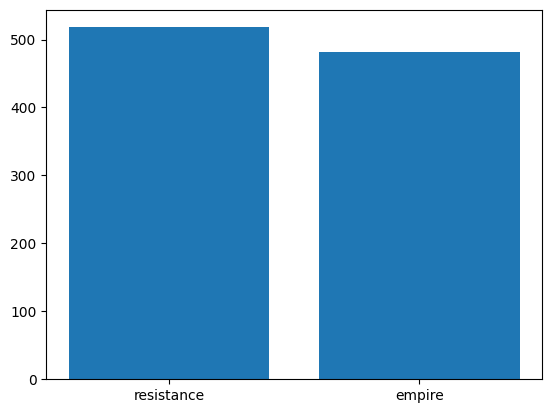

In [231]:
from matplotlib import pyplot as plt 

plt.bar(df['empire_or_resistance'].unique(), df['empire_or_resistance'].value_counts())

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X = df[['homeworld', 'unit_type']]
#print(df.columns)
y = df['is_resistance']


In [233]:
categorical_features = ['homeworld', 'unit_type']

X = pd.get_dummies(df[['homeworld', 'unit_type']])

In [234]:
dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.605


In [238]:
importances = dt.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances)


                         Feature  Importance
0             homeworld_Alderaan    0.059302
1          homeworld_Aleen Minor    0.008627
2           homeworld_Bestine IV    0.010345
3                homeworld_Cerea    0.006485
4             homeworld_Champala    0.010545
5            homeworld_Chandrila    0.032524
6         homeworld_Concord Dawn    0.012061
7             homeworld_Corellia    0.017316
8              homeworld_Dagobah    0.006925
9             homeworld_Dathomir    0.019620
10               homeworld_Dorin    0.008933
11              homeworld_Eriadu    0.009118
12         homeworld_Glee Anselm    0.019999
13          homeworld_Haruun Kal    0.002888
14             homeworld_Iktotch    0.008055
15            homeworld_Iridonia    0.003296
16               homeworld_Kalee    0.015792
17            homeworld_Kashyyyk    0.042790
18           homeworld_Malastare    0.008390
19              homeworld_Mirial    0.024476
20            homeworld_Mon Cala    0.043354
21        

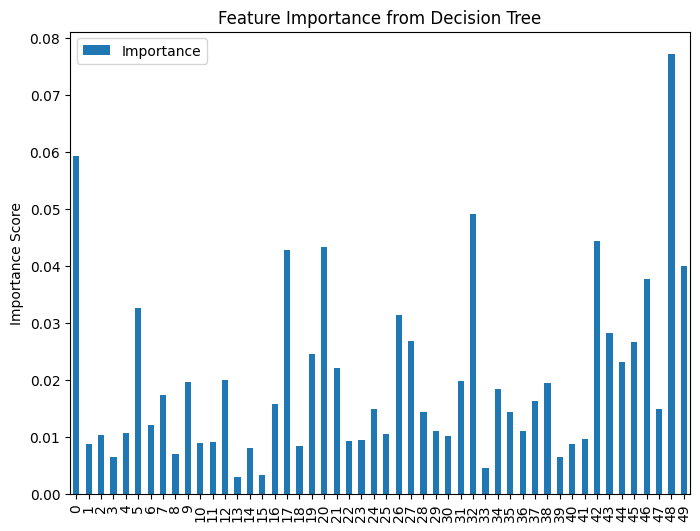

In [239]:
feature_importances.plot(kind='bar', figsize=(8,6))
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance Score")
plt.show()
##plt.bar(feature_importances['Feature'], max(feature_importances['Importance'])) # make names vertica;l
#plt.xticks(rotation=90)

In [62]:
import pickle as pkl

with open("trained_model.pkl", "wb") as f:
    pkl.dump(dt, f)

In [63]:
import pyarrow as pa
import fastparquet as fp

df_1m = pd.read_csv("troop_movements_1m.csv")

print(df_1m.head(10))

             timestamp  unit_id           unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214        tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154        stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778        tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023        tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117               at-st         6.0         8.0   
5  2023-04-06 19:26:03  5893460              x-wing         2.0         7.0   
6  2023-03-05 22:52:50  8653686        tie_silencer         6.0         9.0   
7  2023-03-26 10:26:45  6880282        tie_silencer         9.0         1.0   
8  2023-02-24 10:42:24  9478496  resistance_soldier         1.0         3.0   
9  2023-05-10 22:57:10  2930983        tie_silencer         8.0         0.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    M

In [64]:
df_1m.loc[df_1m["unit_type"] == "invalid_unit", "unit_type"] = "unknown"

df_1m['location_x'] = df_1m['location_x'].bfill()
df_1m['location_y'] = df_1m['location_y'].bfill()

In [65]:
has_invalid = (df_1m["unit_type"] == "invalid_unit").any()

if has_invalid:
    sample_invalid = df_1m[df_1m["unit_type"] == "invalid_unit"].sample(min(5, len(df_1m[df_1m["unit_type"] == "invalid_unit"])))
    print("Sample of rows with invalid units:")
    print(sample_invalid)
else:
    print("No invalid units found in the DataFrame.")

missing_count = df_1m["location_x"].isna().sum()
total_rows = len(df_1m)
missing_percentage = (missing_count / total_rows) * 100

print(f"Missing location_x values: {missing_count} out of {total_rows} rows ({missing_percentage:.2f}%)")


No invalid units found in the DataFrame.
Missing location_x values: 0 out of 1000000 rows (0.00%)


In [66]:
fp.write('troop_movements_1m.parquet', df_1m)

In [71]:
with open('trained_model.pkl', 'rb') as f:
    dt = pkl.load(f)

In [74]:
parquet_file = fp.ParquetFile('troop_movements_1m.parquet')
cleaned_df = parquet_file.to_pandas()

print(type(cleaned_df))

<class 'pandas.core.frame.DataFrame'>


In [81]:

X = pd.get_dummies(cleaned_df[['homeworld', 'unit_type']])
predictions = dt.predict(X)

print(cleaned_df.head(10))
print(predictions[0 : 10])

             timestamp  unit_id           unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214        tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154        stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778        tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023        tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117               at-st         6.0         8.0   
5  2023-04-06 19:26:03  5893460              x-wing         2.0         7.0   
6  2023-03-05 22:52:50  8653686        tie_silencer         6.0         9.0   
7  2023-03-26 10:26:45  6880282        tie_silencer         9.0         1.0   
8  2023-02-24 10:42:24  9478496  resistance_soldier         1.0         3.0   
9  2023-05-10 22:57:10  2930983        tie_silencer         8.0         0.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    M

In [84]:
# Add predictions to your DataFrame
cleaned_df['predictions'] = predictions

print(cleaned_df.head(15))

              timestamp  unit_id           unit_type  location_x  location_y  \
0   2023-06-03 03:19:15   919214        tie_silencer         2.0         5.0   
1   2023-02-24 13:50:40  9467154        stormtrooper         9.0         0.0   
2   2023-03-29 19:54:55  6585778        tie_silencer         0.0         6.0   
3   2023-04-30 00:58:11  3878023        tie_silencer         4.0         2.0   
4   2023-04-10 22:00:26  5537117               at-st         6.0         8.0   
5   2023-04-06 19:26:03  5893460              x-wing         2.0         7.0   
6   2023-03-05 22:52:50  8653686        tie_silencer         6.0         9.0   
7   2023-03-26 10:26:45  6880282        tie_silencer         9.0         1.0   
8   2023-02-24 10:42:24  9478496  resistance_soldier         1.0         3.0   
9   2023-05-10 22:57:10  2930983        tie_silencer         8.0         0.0   
10  2023-03-17 19:15:32  7629318         tie_fighter         5.0         6.0   
11  2023-04-27 21:09:16  4065330        